# Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset:

In [2]:
data = pd.read_csv('/content/Mall_Customers.csv')

# Display the first five rows of the dataset:

In [3]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Encode 'Gender' column (e.g., Male: 0, Female: 1):





In [4]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


# Define features for clustering:

In [5]:
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


# Standardize the features:

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method:

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


# Plot the elbow graph:

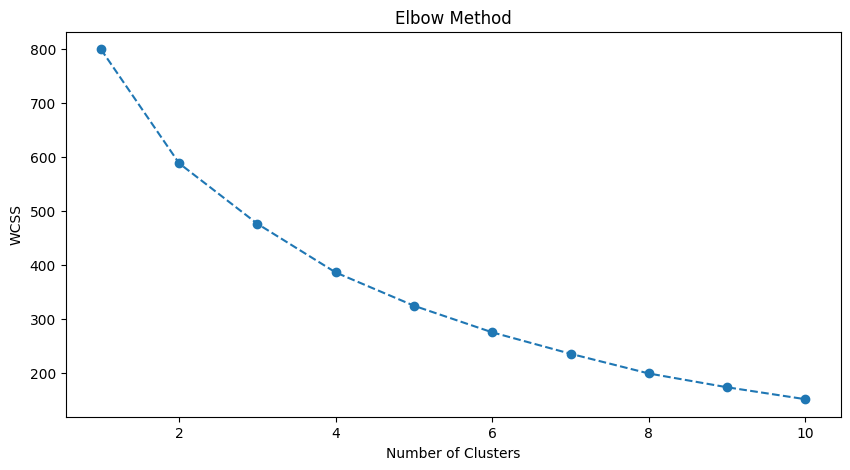

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


# Choose the optimal number of clusters (e.g., 5) based on the elbow graph:

In [9]:
optimal_clusters = 5

# Fit the K-means model with the optimal number of clusters:

In [10]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset:

In [11]:
data['Cluster'] = clusters

# Analyze the resulting clusters:

In [12]:
print(data.groupby('Cluster').mean())

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0        102.854545  1.000000  28.345455           60.800000   
1        103.375000  0.000000  28.250000           62.000000   
2         66.651163  1.000000  48.720930           46.186047   
3         72.612903  0.000000  55.903226           48.774194   
4        167.451613  0.451613  40.419355           90.000000   

         Spending Score (1-100)  
Cluster                          
0                     68.654545  
1                     71.675000  
2                     39.674419  
3                     38.806452  
4                     15.741935  


# Visualize the clusters:

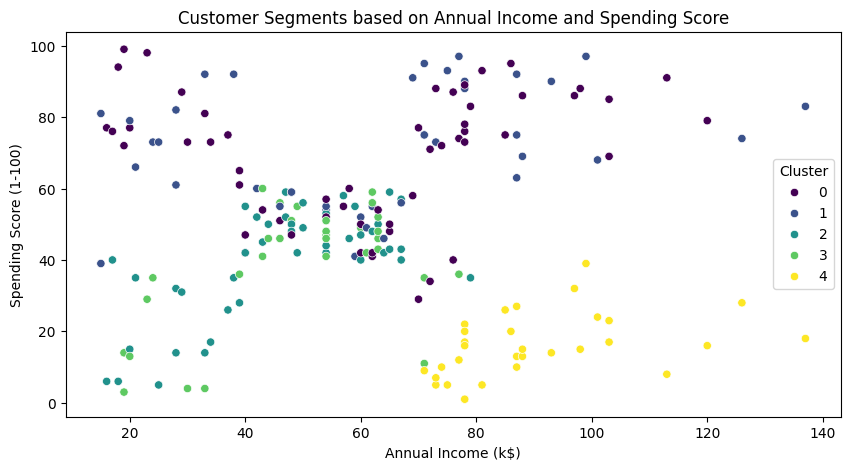

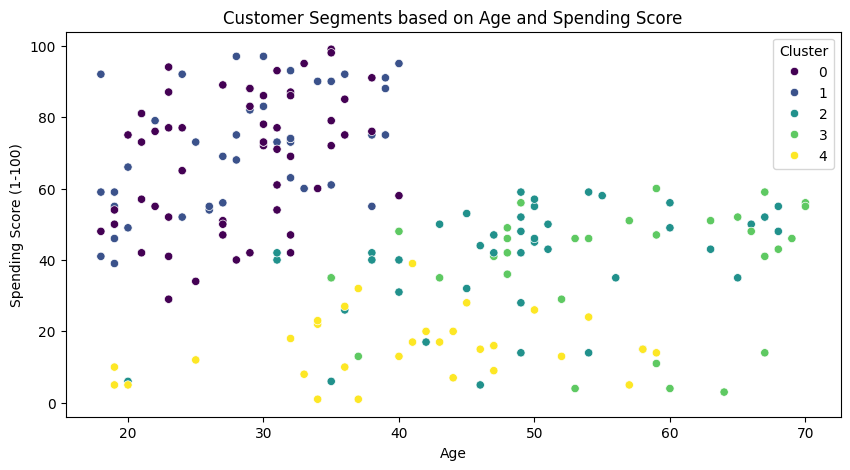

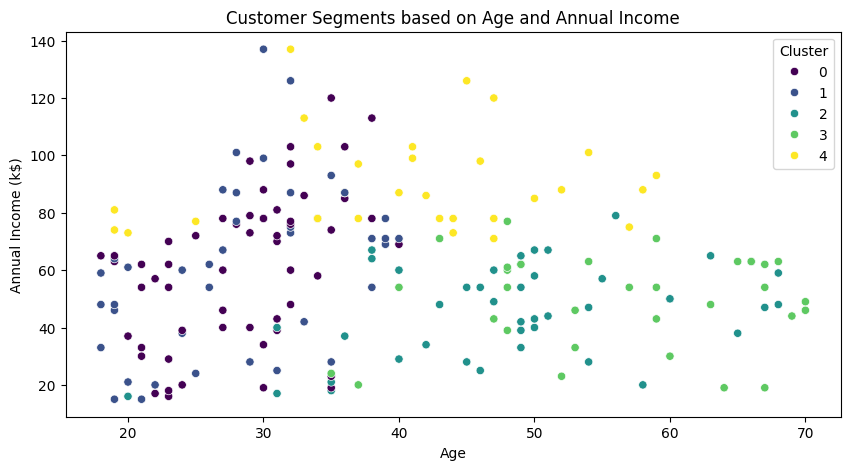

In [13]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments based on Age and Spending Score')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments based on Age and Annual Income')
plt.show()